# Dashboard

https://public.tableau.com/views/Milestone_Phase0_FTDS/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

# Perkenalan

Nama  : Immanuel Yosia Alfrenco

Batch : 15

---
**MILESTONE 1**

---




# Identifikasi Masalah

Topik Permasalahan :

Sejak tahun 2008, Airbnb menjadi salah satu platform pemesanan dan penyewaan homestay untuk liburan ataupun wisata. Dataset yang digunakan ini berisi daftar penginapan yang ada di New York. 


Latar Belakang :

Airbnb, Inc merupakan perusahaan Amerika yang mengoperasikan pasar online untuk penginapan, terutama homestay untuk persewaan liburan, dan aktivitas pariwisata. Airbnb berbasis di San Francisco, California, platform ini dapat diakses melalui situs web dan aplikasi mobile. Airbnb tidak memiliki satupun properti yang ada dalam sistem, ia mendapat untung dengan menerima komisi dari setiap pemesanan. Perusahaan ini didirikan pada tahun 2008. Airbnb adalah versi singkat dari nama aslinya, AirBedandBreakfast.com. Airbnb memiliki banyak user, salah satunya di New York. New York sendiri merupakan salah satu negara bagian yang sangat terkenal dan memiliki banyak destinasi wisata. Banyaknya wisata membuat New York kebanjiran wisatawan dari manca negara sehingga butuh banyak penginapan/homestay. Tujuan dari pengolahan data ini adalah untuk mengetahui daerah terbaik yang memiliki banyak pilihan airbnb terbaik untuk para wisatawan dari dalam maupun luar negeri.

Problem Statement :

* Mengetahui daerah yang memiliki jumlah AirBnB terbaik paling banyak di New York.


5W+1H :

*   Wilayah mana yang memiliki jumlah Airbnb terbanyak?
*   Properti mana yang memiliki jumlah review paling banyak?
*   Siapa host yang memiliki paling banyak properti?
*   Wilayah mana yang memiliki rating tinggi terbanyak?
*   Wilayah mana yang memiliki jumlah properti dengan rating tinggi terbanyak?
*   Apa jenis distribusi dari harga di wilayah Manhattan?
*   Bagaimana hubungan antara wilayah dan status verifikasi host?

SMART :

* S : Membantu para pemilik Airbnb di kota terpilih untuk mengingkatkan review Airbnb mereka
* M : Meningkatkan rata-rata jumlah review perbulan sebanyak 4 point
* A : Mengarahkan para wisatawan untuk memilih Airbnb di kota yang terpilih dibandingkan dengan kota lain
* R : Goals ini bisa tercapai karena banyak Airbnb yang review perbulannya mencapai di atas angka 4
* T : Meningkatkan rata-rata jumlah review perbulan dalam waktu 3 bulan



# Data Loading

Pertama kita harus melakukan import library dan juga memasukan data yang akan digunakan

In [2]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=de68fb22e23cc4c0cf334da697eda90742992de36cdf65d2233ad021d1cd04f5
  Stored in directory: /Users/immanuel/Library/Caches/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Melakukan import library yang dibutukan dalam milestone
import pandas as pd
import pandasql as ps
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Melakukan load data csv dan mengubahkan menjadi dataframe
df = pd.read_csv('https://raw.githubusercontent.com/alfrenco/file_milestone/main/airbnb_nyc_clean.csv')

Setelah data sudah masuk kita bisa melakukan checking pada data menggunakan method head() dan tail()

In [5]:
list(df)

['id',
 'name',
 'host_id',
 'host_identity_verified',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'lat',
 'long',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'price',
 'service_fee',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365',
 'house_rules']

In [6]:
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,13.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.0,124.0,3.0,0.0,2019-06-14,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,blank,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,74.0,13.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [7]:
df.tail()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
69300,57361342,Sunny budget friendly room in Bushwick,29964876857,verified,blank,Brooklyn,Bushwick,40.69370,-73.91006,True,...,624.73607,124.894026,5.0,3.0,2018-04-09,0.11,1.0,1.0,0.0,Please be mindful that I live in the same buil...
69301,57361894,"Cozy Apartment on Bedford Ave, Brooklyn",92852058426,unconfirmed,blank,Brooklyn,Williamsburg,40.71284,-73.96284,False,...,624.73607,124.894026,7.0,15.0,2018-01-01,0.55,4.0,1.0,0.0,blank
69302,57362446,Your 1 bedroom home away from home!,95572379802,verified,blank,Manhattan,Upper West Side,40.79563,-73.97634,True,...,624.73607,124.894026,3.0,38.0,2019-06-10,1.40,3.0,1.0,31.0,blank
69303,57362999,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,80154173698,verified,blank,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,...,624.73607,124.894026,1.0,81.0,2019-03-05,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...
69304,57363551,Sunny Brownstone Studio in BedStuy Brooklyn,11145329848,unconfirmed,Jamal,Brooklyn,Bedford-Stuyvesant,40.68221,-73.94618,False,...,624.73607,124.894026,2.0,104.0,2019-06-12,3.69,5.0,1.0,268.0,blank


# Data Cleaning

Pertama kita harus mengecek informasi dasar tentang data yang digunakan seperti jumlah isi data dan tipe datanya

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  construction_year               

Selanjutnya kita bisa mengecek apakah terdapat missing values pada data kita

In [9]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64

Karena sudah tidak terdapat missing values, kita bisa mengecek apakah pada kolom yang memiliki data numerik terdapat outliers atau tidak

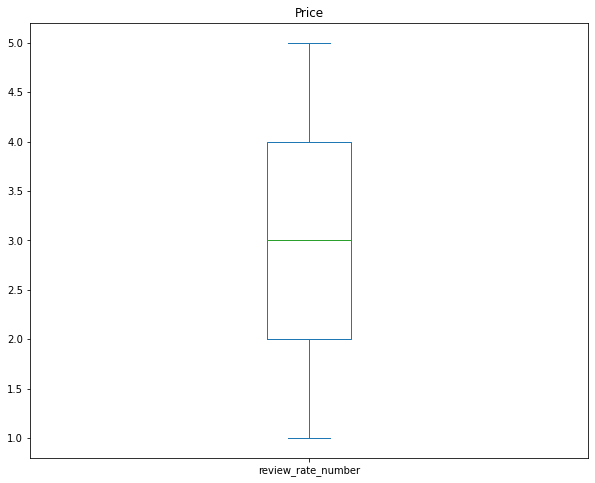

In [10]:
# Mengecek outliers pada kolom price
price_df = df['review_rate_number']
price_df.plot(kind='box', title='Price', figsize=(10,8))
plt.show()

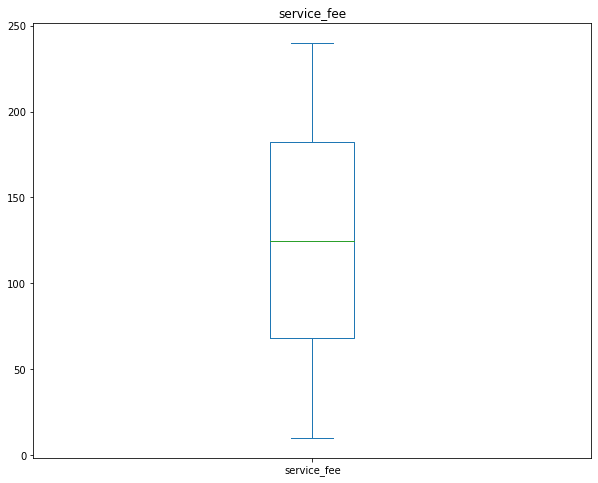

In [11]:
# Mengecek outliers pada kolom price
price_df = df['service_fee']
price_df.plot(kind='box', title='service_fee', figsize=(10,8))
plt.show()

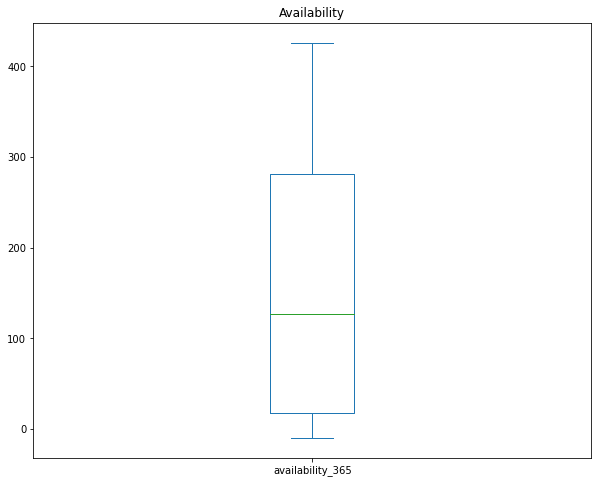

In [12]:
# Mengecek outliers pada kolom price
price_df = df['availability_365']
price_df.plot(kind='box', title='Availability', figsize=(10,8))
plt.show()

Dari hasil di atas kita bisa melihat bahwa pada kolom price, service fee, dan availability tidak terdapat outlier, artinya data sudah siap untuk digunakan dan dianalisis

# Analisis dan Perhitungan

## Visualisasi

Pertama, kita ingin mengetahui ada berapa bagian wilayah di New York dan juga distrik di dalamnya

In [13]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Setelah mengetahui nama wilayah di New York, kita akan mencari tahu informasi tentang wilayah-wilayah ini

In [15]:
df['neighbourhood_group'].value_counts()

Manhattan        29587
Brooklyn         27895
Queens            9262
Bronx             1912
Staten Island      649
Name: neighbourhood_group, dtype: int64

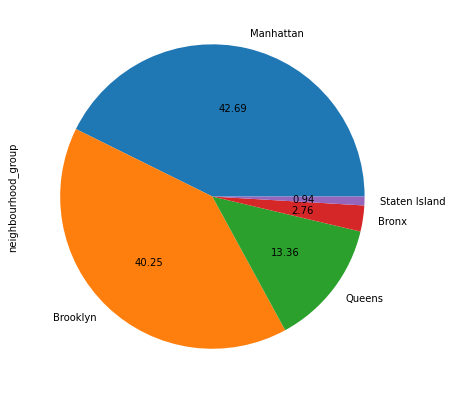

In [16]:
df['neighbourhood_group'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%.2f')
plt.show()

Dari hasil visual di atas kita bisa melihat bahwa wilayah Manhattan memiliki jumlah Airbnb terbanyak yaitu sebanyak 29587 properti atau sebanyak 42.69% dari seluruh New York, dan Staten Island memiliki jumlah Airbnb paling sedikit yaitu hanya 649 properti atau sebesar 0.94% dari seluruh New York.

In [17]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            629.491189
Brooklyn         626.276070
Manhattan        622.101014
Queens           627.898325
Staten Island    619.534990
Name: price, dtype: float64

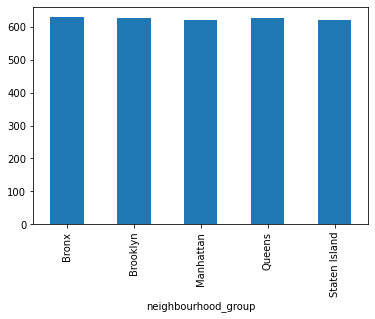

In [18]:
df.groupby('neighbourhood_group')['price'].mean().plot(kind='bar', )
plt.show()

Dari hasil visual di atas kita bisa meilhat bahwa meskipun Manhattan memiliki jumlah Airbnb terbanyak namun Bronx memiliki rata-rata harga tertinggi yaitu sebesar 629.49 dollar.

In [19]:
df.groupby('neighbourhood_group')['construction_year'].agg(pd.Series.mode)

neighbourhood_group
Bronx            2022.0
Brooklyn         2012.0
Manhattan        2012.0
Queens           2006.0
Staten Island    2004.0
Name: construction_year, dtype: float64

Dari hasil di atas kita bisa melihat bahwa Bronx memiliki banyak bangunan baru yang mungkin menyebabkan rata-rata harga di Bronx adalah yang paling tinggi

In [20]:
df.groupby('neighbourhood_group')['reviews_per_month'].mean()

neighbourhood_group
Bronx            1.604529
Brooklyn         1.254143
Manhattan        1.200440
Queens           1.681825
Staten Island    1.624037
Name: reviews_per_month, dtype: float64

Airbnb di wilayan Queens memiliki rata-rata jumlah review perbulan paling tinggi yaitu 1.68 review perbulan, dimana Manhattan meskipun memiliki jumlah Airbnb terbanyak, dia memiliki rata-rata review perbulan paling sedikit

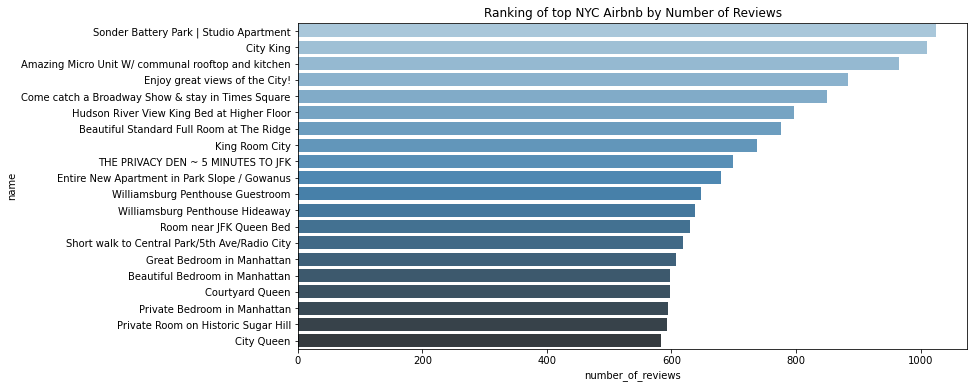

In [21]:
plt.figure(figsize=(12,6))
temp = df.sort_values(by="number_of_reviews", axis=0, ascending=False).iloc[:20, :]
sns.barplot(data=temp, y='name', x='number_of_reviews', palette="Blues_d")
plt.title('Ranking of top NYC Airbnb by Number of Reviews')
plt.show()

Dari visual di atas kita bisa melihat 20 properti dengan jumlah review paling banyak di New York

In [22]:
df.groupby('neighbourhood_group')['number_of_reviews'].sum()

neighbourhood_group
Bronx             60258.0
Brooklyn         825306.0
Manhattan        725631.0
Queens           305325.0
Staten Island     24290.0
Name: number_of_reviews, dtype: float64

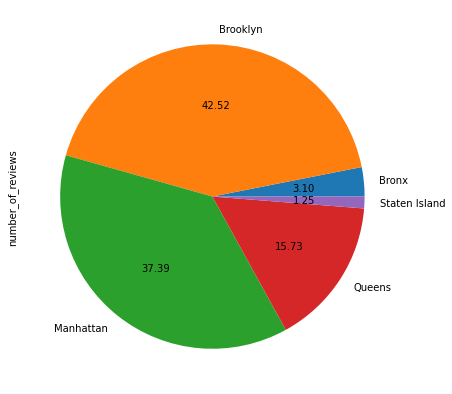

In [23]:
df.groupby('neighbourhood_group')['number_of_reviews'].sum().plot(kind='pie', figsize=(7,7), autopct='%.2f')
plt.show()

Dari hasil visual di atas kita bisa melihat bahwa wilayah Brooklyn memiliki total review paling banyak pada properti Airbnb di dalamnya yaitu sebanyak 825306 review.

In [24]:
temp = pd.DataFrame(df['host_name'].value_counts()).reset_index().iloc[:10, :]
temp

,index,host_name
0,Michael,582
1,David,499
2,Alex,385
3,Sonder (NYC),374
4,John,374
5,Karen,359
6,blank,313
7,Daniel,312
8,Maria,290
9,Blueground,288


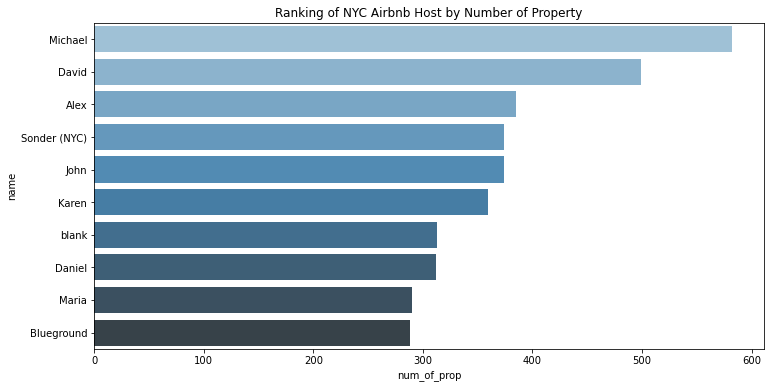

In [25]:
plt.figure(figsize=(12,6))
temp = pd.DataFrame(df['host_name'].value_counts()).reset_index().iloc[:10, :]
temp.columns = ['name', 'num_of_prop']
ax = sns.barplot(data=temp, y='name', x='num_of_prop', palette="Blues_d")
plt.title('Ranking of NYC Airbnb Host by Number of Property')
plt.show()

Kita bisa melihat nama-nama pemilik Airbnb dengan jumlah properti terbanyak. Host dengan nama Michael memiliki jumlah properti terbanyak yaitu 582, dan disusul oleh David dengan jumlah properti 499.

In [26]:
fig = px.sunburst(df, path=['neighbourhood_group', 'review_rate_number'], 
                title='Daerah dengan Jumlah Masing-Masing Rating')
fig.update_traces(root_color="lightgrey")
fig.show()

Dari visual di atas kita bisa melihat bahwa kota Manhattan memiliki jumlah properti dengan rating 5 terbanyak yaitu sebanyak 6913 properti.

## Statistik Deskriptif

Saya akan mencari tahu jenis distribusi dari harga tiap properti di Manhattan

In [27]:
manh = df[df['neighbourhood_group'] == 'Manhattan']

print ('Min: ' + str(manh['price'].min()))
print ('Mode: ' + str(manh['price'].mode()[0]))
print ('Median: ' + str(manh['price'].median()))
print ('Mean: ' + str(manh['price'].mean()))
print ('Max: ' + str(manh['price'].max()))

Min: 50.0
Mode: 624.7360700839849
Median: 624.0
Mean: 622.101014086571
Max: 1200.0


Dari hasil di atas kita bisa melihat bahwa harga properti tertinggi di Manhattan adalah 1200 dollar dan yang terendah adalah 50 dollar. Rata-rata harga di Manhattan adalah 622.10 dollar. Jenis distribusi data akan lebih mudah dilihat secara visual, maka akan kita buat histogram persebaran data harga di Manhattan.

Skewness value :  0.00740040036214729


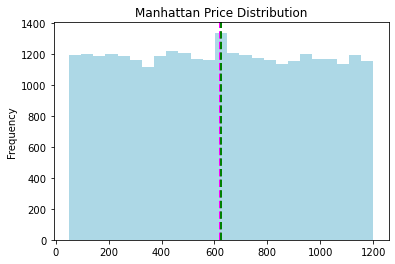

In [28]:
price = manh['price']
price.plot.hist(title='Manhattan Price Distribution', color='lightblue', bins=25)  
plt.axvline(price.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(price.median(), color='green', linestyle='dashed', linewidth=2)
print('Skewness value : ', price.skew())
plt.show()

Dari hasil visual di atas kita bisa melihat bahwa jenis distribusi data adalah normal. Kita juga bisa melihat jenis persebaranya dari nilai skewness atau kemiringan, dimana nilai skewness dari harga di Manhattan sangatlah rendah di angka 0.007 sehingga masih terhitung normal.

## Statistik Inferensial

Saya ingin coba mencari apakah ada hubungan antara wilayah dengan status host Airbnb. Pertama kita akan membuat dataframe berisi nama wilayah dan juga status host dan setelah itu kita akan menghitung menggunakan chi square test.

In [29]:
q1 = """SELECT neighbourhood_group, host_identity_verified FROM df """

chi = pd.DataFrame(ps.sqldf(q1, locals()))
chi

,neighbourhood_group,host_identity_verified
0,Brooklyn,unconfirmed
1,Manhattan,verified
2,Manhattan,unconfirmed
3,Brooklyn,unconfirmed
4,Manhattan,verified
...,...,...
69300,Brooklyn,verified
69301,Brooklyn,unconfirmed
69302,Manhattan,verified
69303,Manhattan,verified


In [30]:
contingency_table=pd.crosstab(df["neighbourhood_group"],df["host_identity_verified"])
contingency_table

host_identity_verified,unconfirmed,verified
neighbourhood_group,,
Bronx,974,938
Brooklyn,14026,13869
Manhattan,14830,14757
Queens,4620,4642
Staten Island,329,320


In [31]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.911
Probably independent


# Kesimpulan

Dari hasil analisis di atas kita bisa mengambil kesimpulan bahwa wilayah Manhattan memiliki Airbnb dengan rating 5 terbanyak dengan jumlah 6913 properti, maka kita bisa memfokuskan iklan dan marketing Airbnb untuk mengarahkan para wisatawan agar memilih Airbnb di Manhattan sehingga akan meningkatkan jumlah review perbulan.